In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# 读取ROC数据
rf_roc = pd.read_csv("../RF/ROC.csv",sep = ",",header= None)
ext_roc = pd.read_csv("../EXT/ROC.csv",sep = ",",header= None)
xgb_roc = pd.read_csv("../XGB/ROC.csv",sep = ",",header= None)

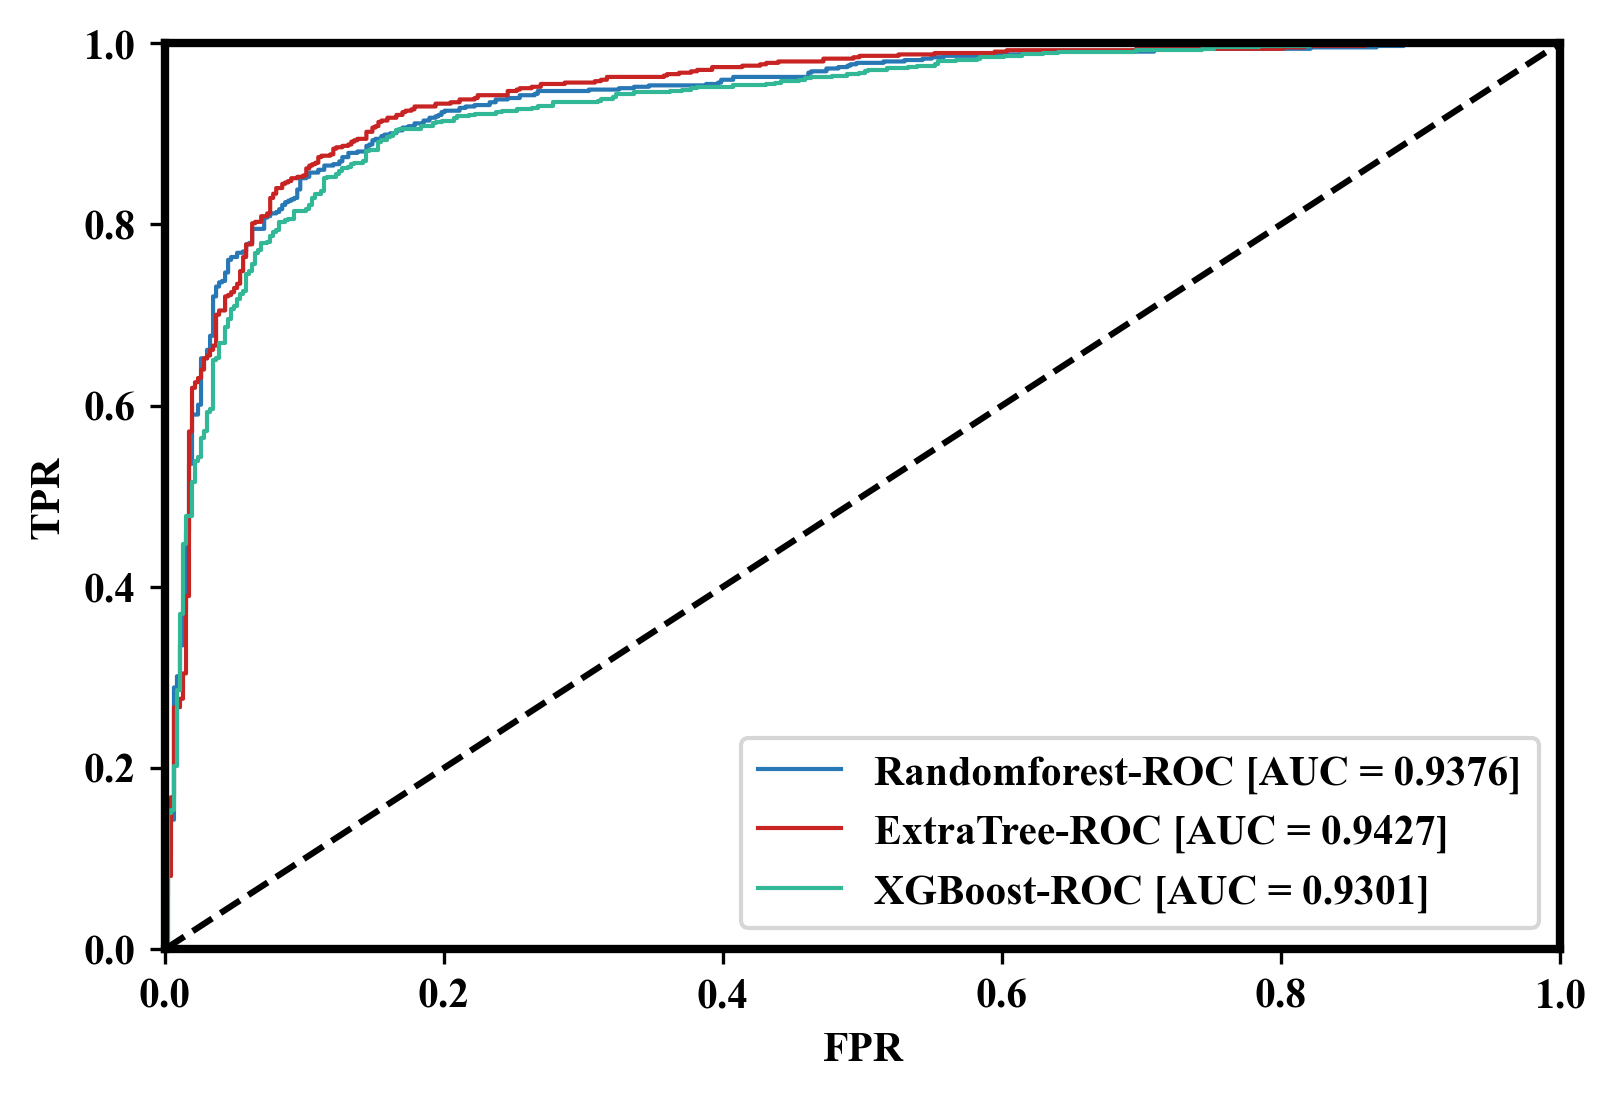

In [5]:
plt.rcParams["axes.labelweight"] ="bold"
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.weight"]="bold"
plt.rcParams["font.size"]=10

fig,ax = plt.subplots(dpi=300)
# 设置边框
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
label = ["Randomforest-ROC [AUC = 0.9376]","ExtraTree-ROC [AUC = 0.9427]","XGBoost-ROC [AUC = 0.9301]"]
color = ["#2878B5","#C82423","#32B897"]
model = [rf_roc,ext_roc,xgb_roc]
for i in range(len(model)):
    ax.plot(
                 model[i][0]
                ,model[i][1]
                ,label = label[i]
                ,color = color[i]
                ,linewidth = 1
                ,linestyle="-"
                ,marker="None")
    #ax.fill_between(
    #            model[i][0],model[i][1],[0 for i in model[i][0]]
    #            ,facecolor=color[i], alpha=0.9)
# 绘制y = x曲线
ax.plot(model[0][0], model[0][0]
                , color = "black"
                , linewidth = 1.5
                ,linestyle = "--"
                ,marker = "None"
                )
plt.legend()
plt.savefig("{}.tiff".format("rf-ext-xgb-roc"))
plt.savefig("{}.jpg".format("rf-ext-xgb-roc"))


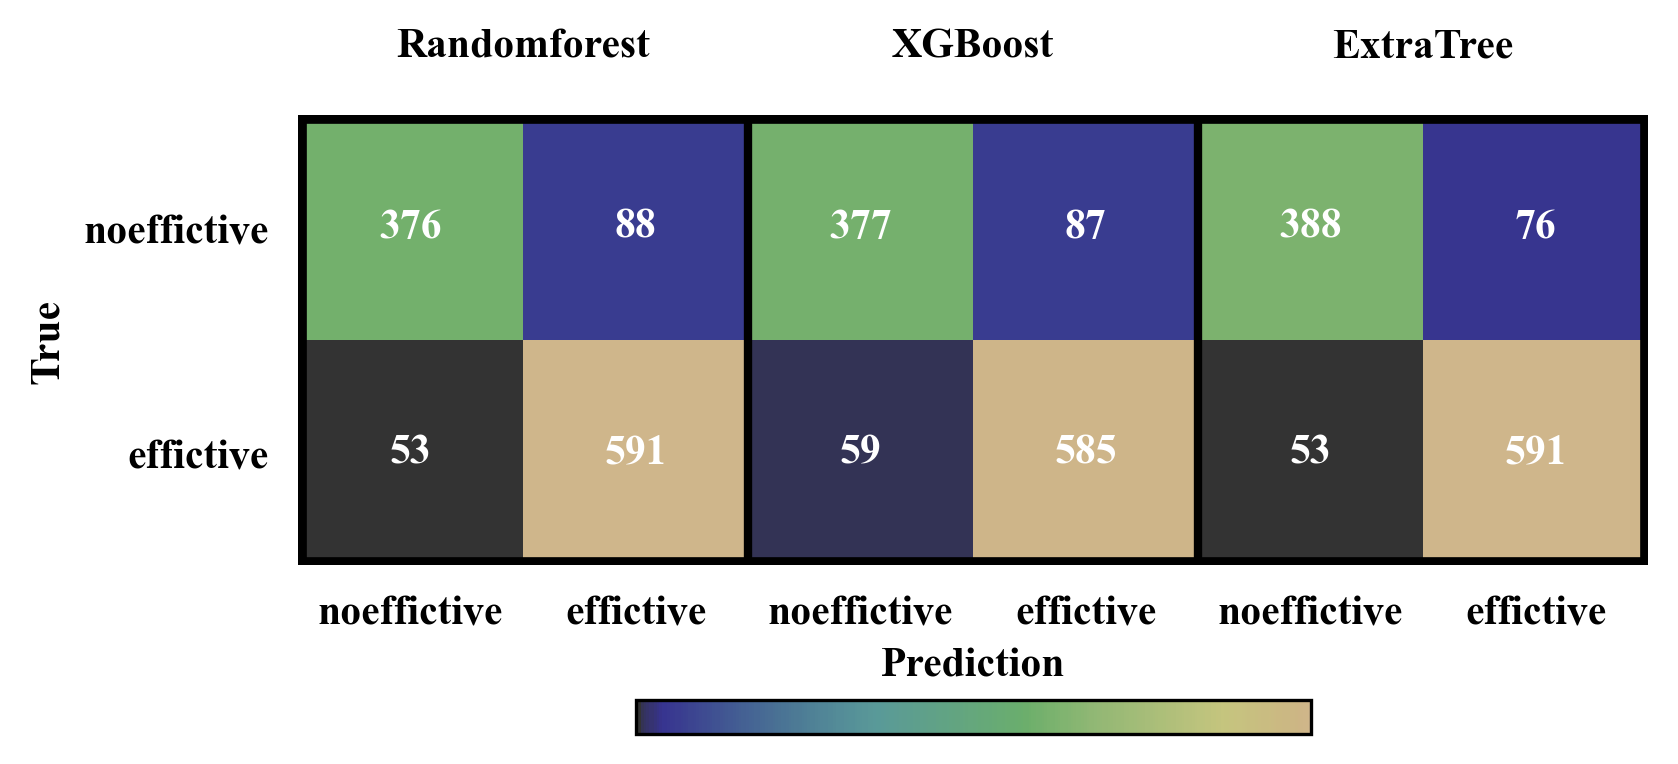

In [6]:
import matplotlib.colors as colors
# 绘制混淆矩阵

data = np.array([[376  ,88      ,377   ,87      ,388    ,76]
                                 ,[53     ,591    ,59     ,585    ,53      ,591]])


plt.rcParams["axes.labelweight"] ="bold"
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.weight"]="bold"
plt.rcParams["font.size"]=10

fig,ax = plt.subplots(dpi=300)
# 隐藏刻度线
ax.tick_params(bottom=False, top=False, left=False, right=False)
# 设置边框

ax.spines['bottom'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


plt.xticks([0,1,2,3,4,5],["noeffictive","effictive","noeffictive","effictive","noeffictive","effictive"])
plt.yticks([0.0,1.0],["noeffictive","effictive"])
ax.set_xlabel("Prediction")
ax.set_ylabel("True")
plt.subplots_adjust(0.2,0.2,0.95,0.95)
ax.text(0.5,-0.8,"Randomforest",ha="center" ,va="center")
ax.text(2.5,-0.8,"XGBoost",ha="center" ,va="center")
ax.text(4.5,-0.8,"ExtraTree",ha="center" ,va="center")
mycolors = plt.cm.gist_earth(np.linspace(0, 0.8, 256))

mymap = colors.LinearSegmentedColormap.from_list('mymap', mycolors)

im = ax.imshow(data, cmap=mymap,alpha= 0.8)

# 显示数字
x_ = [0,1,2,3,4,5]
y_ = [0,1]
for i,t1 in enumerate(y_):
    for j,t2 in enumerate(x_):
        text = ax.text(t2, t1
                                ,data[i, j]
                                ,ha="center" ,va="center"
                                ,color="w")

plt.colorbar(im, cax=None, ax=None, shrink=0.5
                        ,orientation='horizontal'
                        ,ticks = [])
ax.plot([-0.5,-0.5,-0.5,-0.5,-0.5]
                ,[-0.5,0.0,0.5,1.0,1.5]
                ,color = "black"
                ,linewidth = 4
                ,linestyle = "-"
                ,alpha = 1)
ax.plot([1.5,1.5,1.5,1.5,1.5]
                ,[-0.5,0.0,0.5,1.0,1.5]
                ,color = "black"
                ,linewidth = 2
                ,linestyle = "-"
                ,alpha = 1)
ax.plot([3.5,3.5,3.5,3.5,3.5]
                ,[-0.5,0.0,0.5,1.0,1.5]
                ,color = "black"
                ,linewidth = 2
                ,linestyle = "-"
                ,alpha = 1)
ax.plot([5.5,5.5,5.5,5.5,5.5]
                ,[-0.5,0.0,0.5,1.0,1.5]
                ,color = "black"
                ,linewidth = 4
                ,linestyle = "-"
                ,alpha = 1)
ax.plot([-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5]
                ,[1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5]
                ,color = "black"
                ,linewidth = 4
                ,linestyle = "-"
                ,alpha = 1)
ax.plot([-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5]
                ,[-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5]
                ,color = "black"
                ,linewidth = 4
                ,linestyle = "-"
                ,alpha = 1)
plt.savefig("{}.jpg".format("rf-ext-xgb-Confusion-matrix"))
plt.savefig("{}.tiff".format("rf-ext-xgb-Confusion-matrix"))

In [ ]:
data = np.array([[562,57,557,62,564,55]
                ,[96,405,90,411,92,409]])
print(data.shape)
x_ = [1,5,6,9,3,2]
y_ = [4,1]
for i,t1 in enumerate(x_):
    for j,t2 in enumerate(y_):
        print(data[j,i])